In [1]:
import pandas as pd 
import os
os.chdir('/home/spankaew/Git/BooleanBenchmark')
import logic_ensemble as le

/home/spankaew/anaconda3/envs/network_analysis/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


# Load model path into logic_ensemble object

In [2]:
model_path = '/home/spankaew/Git/BooleanBenchmark/models/toy_reprogramming_1/'
model = le.LogicEnsemble(model_path, project_name = 'toy_reprogramming')
model.create_simulation()

Simulation object created


100%|██████████| 9/9 [00:01<00:00,  7.92it/s]

Simulation completed


From `logic_ensemble` object -> you can define simulation parameters and initial condition of the simulation directly. The simulation gives the node activity at each simulation time that is stored in the object called `.simulation.simulation_df`

In [ ]:
model.simulation.update_parameters(max_time = 10)
model.simulation.run_simulation()

# Create simulation trajectory from the simulation
When we perform the simulation, the result of the timestep node activity can be visualized using dimension reduction method such as `pca`.

Trajectory object created


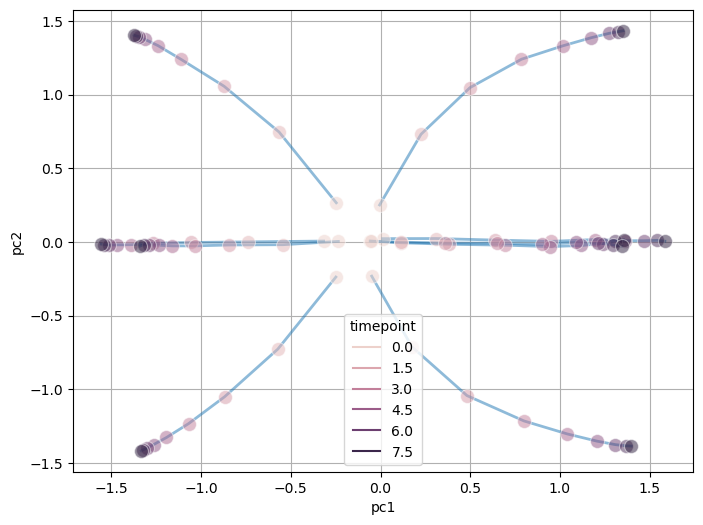

In [3]:
model.create_trajectory()
model.trajectory.pca_trajectory()
model.trajectory.plot_trajectory(color = 'timepoint', show_legend=True)

From the visualization, we can then try to group together models with simular simulation activity via clustering. 

In `logic_ensemble`, we utilize the package called `tslearn` - a toolkit to perform analysis on time series data. 

The timeseries clustering method included in this toolkit includes : 

- euclidean

- dynamic time warping (dtw) 

- softdtw.

The calculated clustering will be embeded into the trajectory matrix

Euclidean k-means
1.580 --> 1.085 --> 1.085 --> 


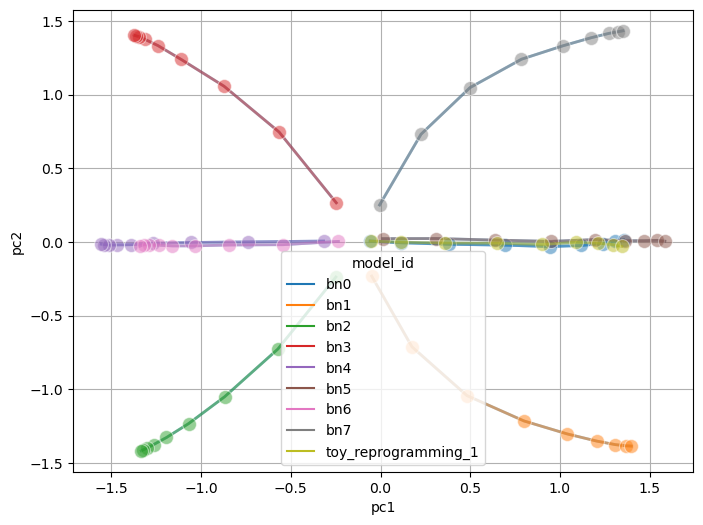

In [4]:
model.trajectory.calculate_kmean_cluster(n_cluster = 5)
model.trajectory.plot_trajectory(show_legend = True)

# Create logic function matrix
In this part of the script, we load models' logic function into a matrix. This matrix can then be transformed into a Disjunctive Normal Form (DNF) which allow us to identify clause of components that can activate each node. 

In [13]:
model.create_logic()
model.logic.model_logic

100%|██████████| 9/9 [00:00<00:00, 56.20it/s]

Model logic loaded
Logic object created


,bn3,bn4,bn7,toy_reprogramming_1,bn5,bn0,bn2,bn6,bn1
G1,(TF1),(TF1),(TF1),(TF1),(TF1),(TF1),(TF1),(TF1),(TF1)
G2,(TF1),(TF1),(TF1),(TF1),(TF1),(TF1),(TF1),(TF1),(TF1)
G3,(TF1),(TF1),(TF1),(TF1),(TF1),(TF1),(TF1),(TF1),(TF1)
G4,(TF2),(TF2),(TF2),(TF2),(TF2),(TF2),(TF2),(TF2),(TF2)
G5,(TF2),(TF2),(TF2),(TF2),(TF2),(TF2),(TF2),(TF2),(TF2)
G6,(TF2),(TF2),(TF2),(TF2),(TF2),(TF2),(TF2),(TF2),(TF2)
G7,(TF6),(TF6),(TF6),(TF6),(TF6),(TF6),(TF6),(TF6),(TF6)
G8,(TF6),(TF6),(TF6),(TF6),(TF6),(TF6),(TF6),(TF6),(TF6)
G9,(TF6),(TF6),(TF6),(TF6),(TF6),(TF6),(TF6),(TF6),(TF6)
TF1,(!TF2) | (TF3),(!TF2 & TF3),(!TF2) | (TF3),(!TF2 & TF3),(!TF2) | (TF3),(!TF2 & TF3),(!TF2 & TF3),(!TF2) | (TF3),(!TF2 & TF3)


100%|██████████| 9/9 [00:00<00:00, 22.74it/s]


Flattend logic clause created


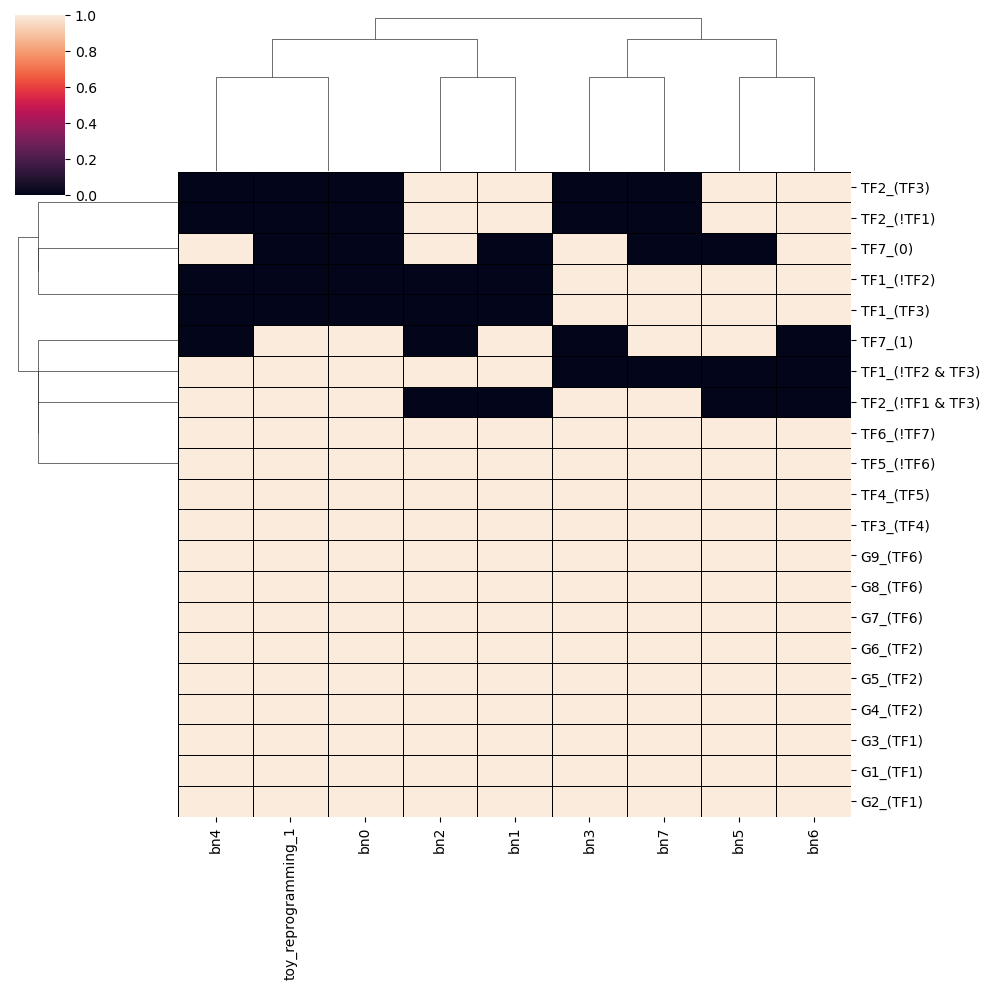

In [16]:
model.logic.create_flattend_logic_clause()

import seaborn as sns
sns.clustermap(model.logic.logic_clause_flattend, linewidth = .4, linecolor = 'black')

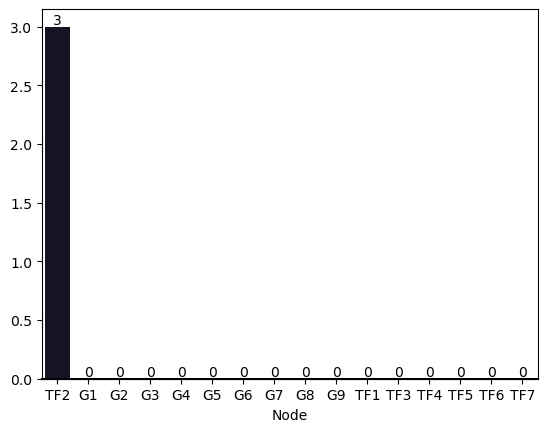

In [71]:
test = model.logic.logic_clause_flattend.copy()
test_dif = test['bn0'] - test['bn1']

# Split the index into two parts
split_index = test_dif.index.str.split('_', expand=True)
split_df = split_index.to_frame(index=False)
split_df['value'] = test_dif.values

# Pivot the DataFrame to create the matrix
matrix = split_df.pivot(index=0, columns= 1, values='value')

# Display the matrix
plot_value = matrix.abs().sum(axis = 1).sort_values(ascending = False)


plot = sns.barplot(x=plot_value.index, y=plot_value.values, palette="rocket")
plot.axhline(0, color="k", clip_on=False)
plot.set_xlabel("Node")
plot.bar_label(plot.containers[0], fontsize=10)
plt.show()

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(10, 18), sharex=True)
plt.ylim(0, 65)

for i in range(6):
    sns.barplot(x=var_logic_clust.index, y=var_logic_clust[i], palette="rocket", ax=axes[i])
    axes[i].axhline(0, color="k", clip_on=False)
    axes[i].set_ylabel(f"Cluster {i}")
    axes[i].bar_label(axes[i].containers[0], fontsize=10)
    axes[i].set_ylim(0, 95)

plt.xticks(rotation=90)
plt.show()

In [72]:
from sklearn.preprocessing import OrdinalEncoder

model_logic = model.logic.model_logic
model_logic_t= model_logic.transpose()

# Ordinal encoding
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(model_logic_t)
encoded_df = pd.DataFrame(encoded_data, columns=model_logic_t.columns)

# 
sort_index = encoded_df.max().sort_values().index

Index(['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'TF3', 'TF4',
       'TF5', 'TF6', 'TF1', 'TF2', 'TF7'],
      dtype='object')